In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
n = 10
borders = [0.4, 0.9] # интервал определяю тут
xs = np.linspace(borders[0], borders[1], n) # линейное пространство для ПЛ

xs

In [ ]:
def f(x): # функцию соответственно тут
    return x*x + np.log10(x) 

#xs = [0.43, 0.53, 0.67, 0.86]; n = len(xs)
ys = [f(_) for _ in xs]
pts = [(xs[i], ys[i]) for i in range(n)]

pts

In [36]:
# лагранж момент

def Lagrange(x, n): # туть он определяется

    rez = 0
    
    for i in range(n):
        Prod = 1

        for j in range(n):
            if (i != j): Prod *= (x - xs[j]) / (xs[i] - xs[j])

        rez += ys[i] * Prod
        Prod = 1

    return rez


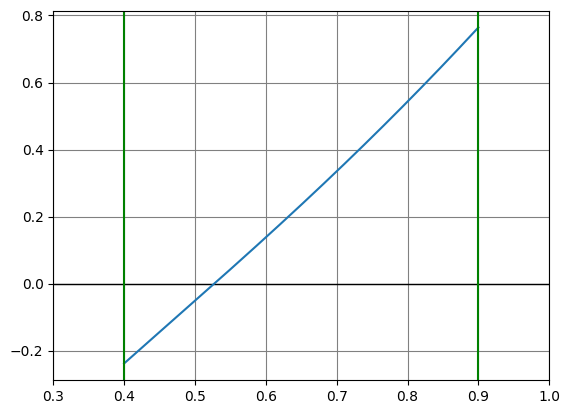

In [37]:
# построение графиков исходной функции и полинома лагранжа

l = np.linspace(borders[0], borders[1], 1000)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, color='gray')
plt.xlim(0.3, 1)

#for p in pts: plt.scatter(p[0], p[1], color='red', zorder=10)

y_fl = f(l)
y_Ll = Lagrange(l, n) # воть тут строится ПЛ

plt.plot(l, y_fl)
#plt.plot( l, y_Ll )

plt.axvline(x=0.4, color="green")
plt.axvline(x=0.9, color="green")



In [ ]:
# норма

def norm(lst):
    return max(list(map(np.fabs, lst)))


# ошибки

DeltaErr = norm(y_Ll - y_fl) # абслютная 

deltaerr = DeltaErr / norm(y_fl) * 100 # относительная


print(n, DeltaErr, deltaerr)

In [39]:
# остаточный член-оценка

# https://www.desmos.com/calculator/iq0ma4i7ge используя знания матанализа я вычисляю n-ый элемент последовательности остатков

def r(n):
    return 0.542868102379 * (5**(n+1)) / (n+1)

In [83]:
# полевые условия

borders = [0.4, 0.9]
ns = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

DeltaErr = {}; deltaerr = {}
rs = {}

print("n\t∆f\t\t\tδf\t\t\tr")
print("="*80)

for n in ns:
    
    xs = np.linspace(borders[0], borders[1], n)
    ys = [f(_) for _ in xs]

    l = np.linspace(borders[0], borders[1], 1000)

    y_fl = f(l)
    y_Ll = Lagrange(l, n)

    DeltaErr[n] = norm(y_Ll - y_fl)
    deltaerr[n] = DeltaErr[n] / norm(y_fl) * 100
    rs[n] = r(n)

    print(n, DeltaErr[n], deltaerr[n], rs[n], sep="\t")

n	∆f			δf			r
3	0.004231214614800596	0.5536481630555677	84.82314099671875
5	0.0001306298979678877	0.017092728597853366	1413.719016611979
10	7.534018961474764e-08	9.858152181304314e-06	2409748.3237704188
20	3.467226505904364e-13	4.536814509896921e-11	12326651581786.928
30	2.4368418394260516e-10	3.188571440777096e-08	8.154601915874668e+19
40	1.1635587585101526e-07	1.5224993953343161e-05	6.0211666204295617e+26
50	5.837802913699619e-05	0.007638678615224421	4.7270954242802546e+33
60	0.07644614939803152	10.002865380272432	3.859532957196033e+40
70	100.68610238702482	13174.627313114483	3.238219498087561e+47
80	56860.06988574314	7440055.89632245	2.7719133917367955e+54
90	76568544.3865855	10018880583.17495	2.4094800044071997e+61
100	63790678470.08707	8346915760664.261	2.1200367458332219e+68


---

3. Графики зависимостей

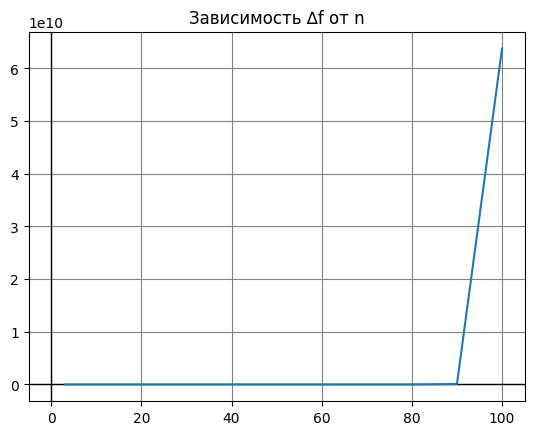

In [81]:
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, color='gray')

plt.title('Зависимость ∆f от n')
plt.plot(ns, list(DeltaErr.values()))

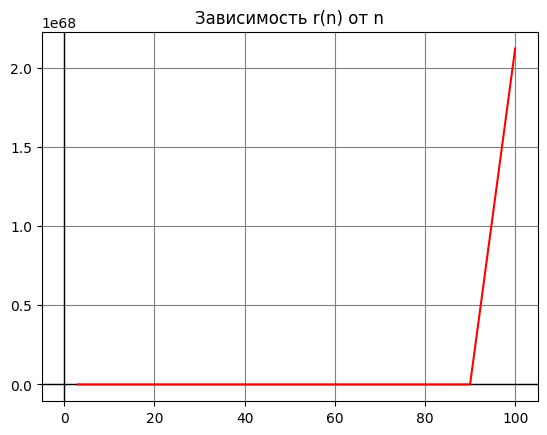

In [82]:
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, color='gray')

plt.title('Зависимость r(n) от n')
plt.plot(ns, list(rs.values()), color='red')